In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
##The Boston Housing Dataset

##The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

##CRIM - per capita crime rate by town
##ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
##INDUS - proportion of non-retail business acres per town.
##CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
##NOX - nitric oxides concentration (parts per 10 million)
##RM - average number of rooms per dwelling
##AGE - proportion of owner-occupied units built prior to 1940
##DIS - weighted distances to five Boston employment centres
##RAD - index of accessibility to radial highways
##TAX - full-value property-tax rate per $10,000
##PTRATIO - pupil-teacher ratio by town
##B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
##LSTAT - % lower status of the population
##MEDV - Median value of owner-occupied homes in $1000's

In [3]:
df = pd.read_csv("homework.csv")

In [4]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


<AxesSubplot:>

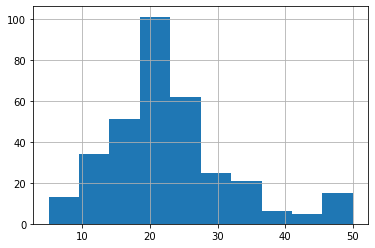

In [6]:
df['medv'].hist()

In [7]:
df.columns


Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [8]:
df_filtered = df[['crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax','lstat', 'medv']]

In [9]:
df_filtered.head()

,crim,zn,chas,nox,rm,age,dis,rad,tax,lstat,medv
0,0.00632,18.0,0,0.538,6.575,65.2,4.0900,1,296,4.98,24.0
1,0.02731,0.0,0,0.469,6.421,78.9,4.9671,2,242,9.14,21.6
2,0.03237,0.0,0,0.458,6.998,45.8,6.0622,3,222,2.94,33.4
3,0.06905,0.0,0,0.458,7.147,54.2,6.0622,3,222,5.33,36.2
4,0.08829,12.5,0,0.524,6.012,66.6,5.5605,5,311,12.43,22.9


In [10]:
from sklearn.model_selection import train_test_split #для разбиения выборки
from sklearn.preprocessing import StandardScaler #для масштабирования данных

from sklearn.linear_model import LinearRegression

In [11]:
X, y = df_filtered[['crim', 'nox', 'rm', 'age', 'dis',
       'tax','lstat']], df_filtered['medv']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# Приводим данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [15]:
linear = LinearRegression()

In [16]:
linear_reg = linear.fit(X_train, y_train)


In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
#mean_squared_error(y_test, linear_reg.predict(X_train))

In [19]:
r2_score(y_test, linear_reg.predict(X_test))

0.6869594833234283

In [20]:
print('MSE(Train): {:.3}'.format(mean_squared_error(y_train, linear_reg.predict(X_train))))
print('MAE(Train): {:.3}'.format(mean_absolute_error(y_train, linear_reg.predict(X_train))))

MSE(Train): 30.6
MAE(Train): 3.94


In [21]:
print('MSE(Test): {:.3}'.format(mean_squared_error(y_test, linear_reg.predict(X_test))))
print('MAE(Test): {:.3}'.format(mean_absolute_error(y_test, linear_reg.predict(X_test))))

MSE(Test): 21.1
MAE(Test): 3.51


#### XgBoost

In [22]:
import xgboost as xgb

In [23]:
#boosting_model = xgb.XGBRegressor(n_estimators=100,
  #                                max_depth = 6,
     #                             learning_rate = 0.1)
boosting_model = xgb.XGBRegressor(
    objective ='reg:linear', 
    colsample_bytree = 0.3, 
    learning_rate = 0.1,
    max_depth = 5, 
    alpha = 10, 
    n_estimators = 10)
xgb_result = boosting_model.fit(X_train, y_train)
#y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_train_predicted = boosting_model.predict(X_train)
y_test_predicted = boosting_model.predict(X_test)

[23:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [24]:
print('MSE(Train): {:.3}'.format(mean_squared_error(y_train, y_train_predicted)))
print('MAE(Train): {:.3}'.format(mean_absolute_error(y_train, y_train_predicted)))
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_train, y_train_predicted))))

MSE(Train): 1.09e+02
MAE(Train): 8.23
RMSE: 10.446270


In [25]:
print('MSE(Test): {:.3}'.format(mean_squared_error(y_test, y_test_predicted)))
print('MAE(Test): {:.3}'.format(mean_absolute_error(y_test, y_test_predicted)))
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, y_test_predicted))))

MSE(Test): 77.7
MAE(Test): 7.13
RMSE: 8.814110


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

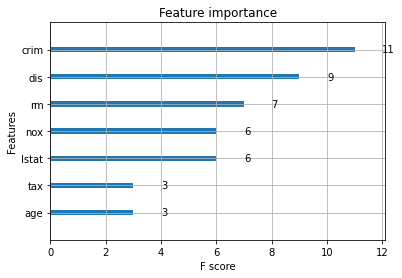

In [26]:
xgb.plot_importance(boosting_model)

#### GridSearchCV

In [27]:
boosting_model_2 = xgb.XGBRegressor()

In [28]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
learning_rate = [0.1, 0.4, 0.7, 1]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate = learning_rate)

In [29]:
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(boosting_model_2 , param_grid, n_jobs=-1, cv=5, verbose=1)

In [30]:
result = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    5.4s finished


In [31]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.839131 using {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}


In [32]:
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

0.801262 (0.059507) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
0.824784 (0.060539) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.828254 (0.062504) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}
0.827720 (0.067085) with: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
0.827699 (0.076509) with: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
0.834895 (0.070184) with: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.836957 (0.068302) with: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
0.837574 (0.068489) with: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
0.833637 (0.075742) with: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}
0.839131 (0.069228) with: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
0.838806 (0.067850) with: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
0.838807 (0.067427) with: {'learning_rate': 0.1, 'max_dep

In [33]:
print('MSE(Train): {:.3}'.format(mean_squared_error(y_train, result.best_estimator_.predict(X_train))))
print('MAE(Train): {:.3}'.format(mean_absolute_error(y_train, result.best_estimator_.predict(X_train))))

MSE(Train): 0.102
MAE(Train): 0.239


In [34]:
print('MSE(Test): {:.3}'.format(mean_squared_error(y_test, result.best_estimator_.predict(X_test))))
print('MAE(Test): {:.3}'.format(mean_absolute_error(y_test, result.best_estimator_.predict(X_test))))

MSE(Test): 7.03
MAE(Test): 2.08


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

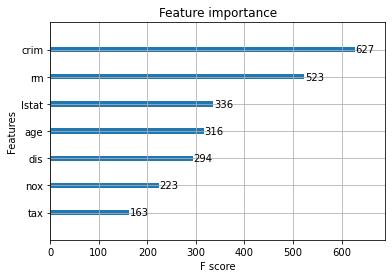

In [35]:
xgb.plot_importance(result.best_estimator_)

#### GridSearch2

In [36]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [49]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=300, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

[23:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [51]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.860348,0.092852,21.876541,0.233806
1,19.941100,0.124644,19.979604,0.155962
2,18.210204,0.106465,18.303967,0.167629
3,16.656791,0.080374,16.786621,0.229064
4,15.231832,0.108009,15.373496,0.193118
...,...,...,...,...
197,1.420525,0.076579,3.460676,0.071426
198,1.420525,0.076579,3.460676,0.071426
199,1.419682,0.077031,3.459639,0.070132
200,1.419682,0.077031,3.459639,0.070132


In [50]:
print((cv_results["test-rmse-mean"]).tail(1))

201    3.459494
Name: test-rmse-mean, dtype: float64


In [47]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[23:49:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


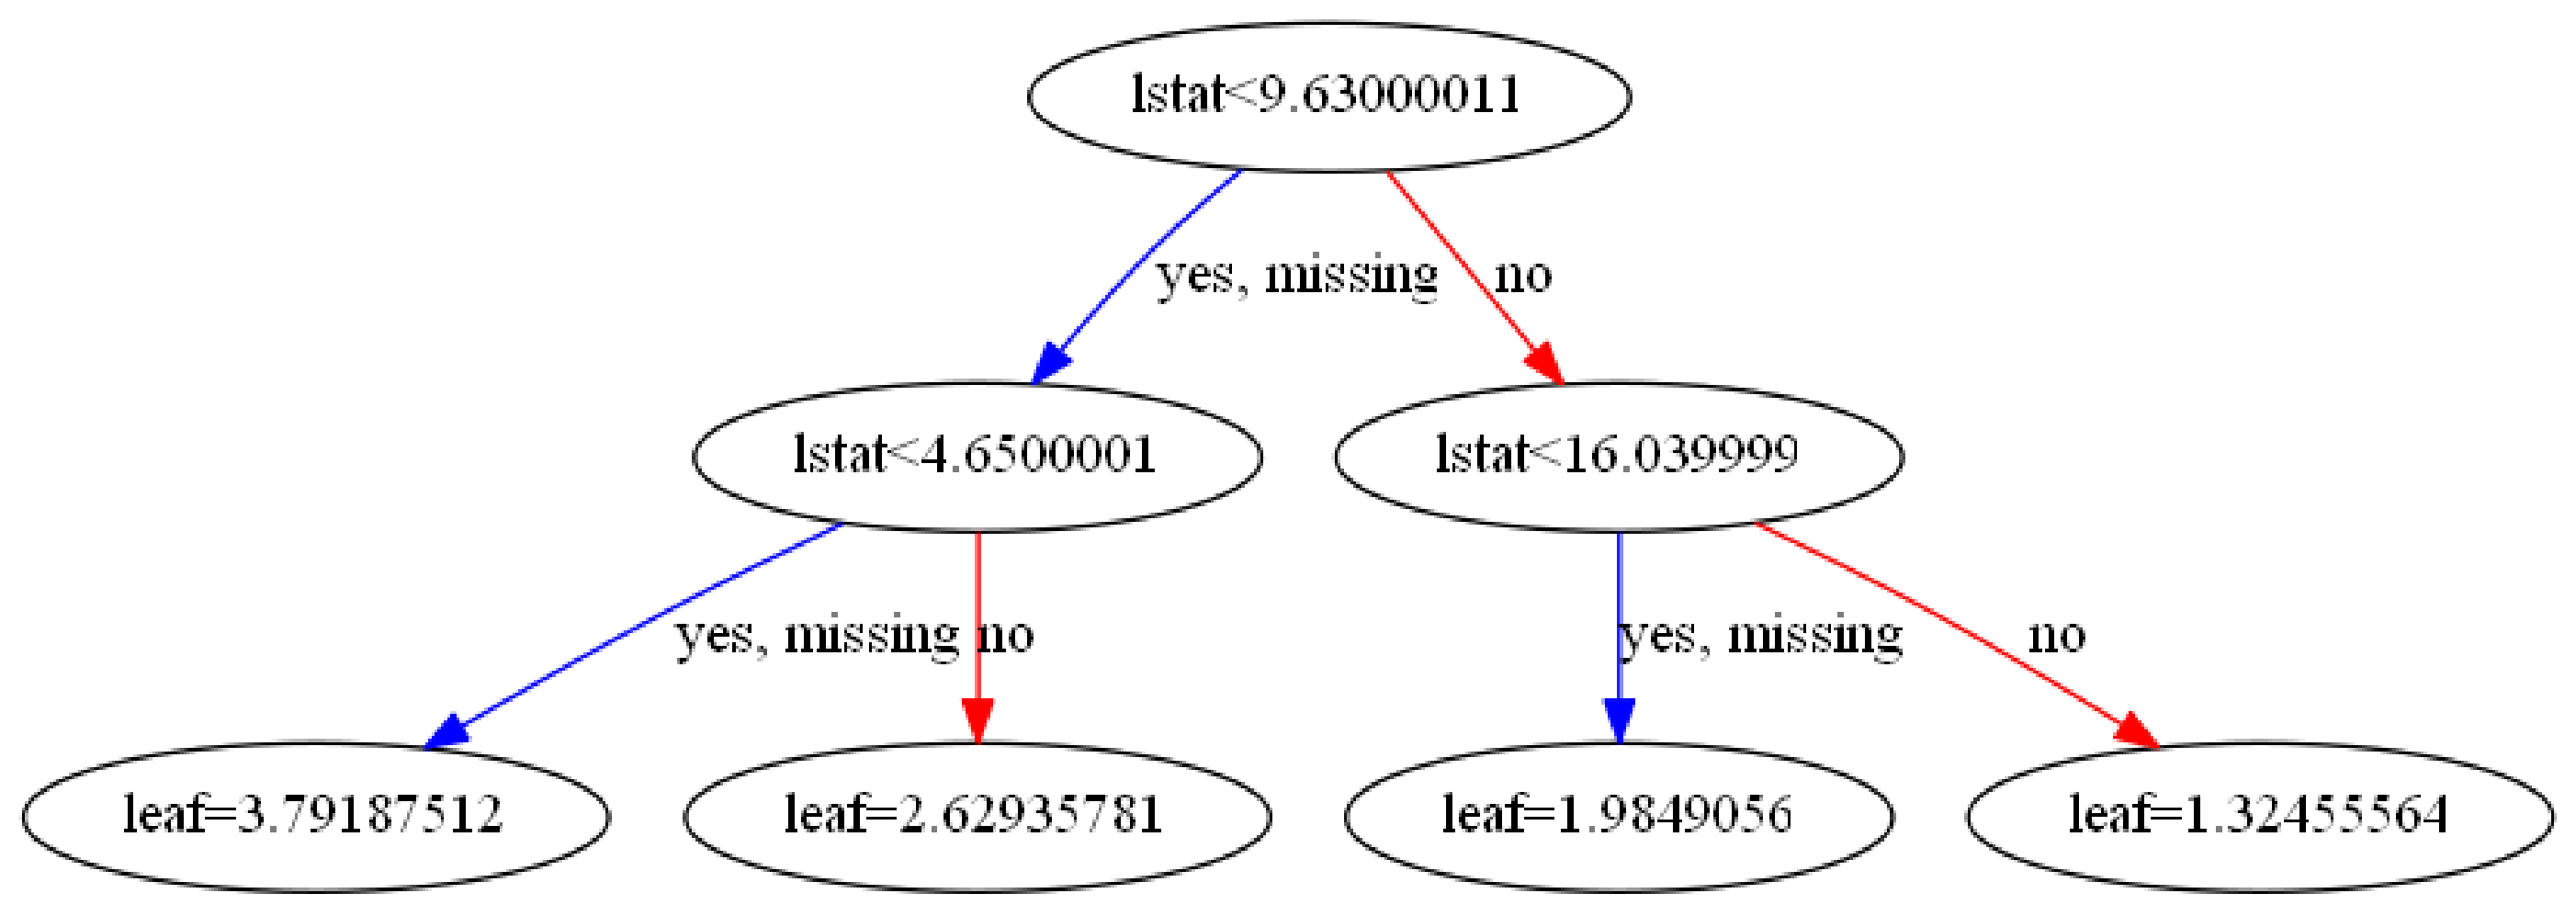

In [48]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 20]
plt.show()